<a href="https://colab.research.google.com/github/Apurva1205/Sales-Ad-Optimization/blob/main/Sales_Opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive

# Mounting Google Drive
drive.mount('/content/gdrive')

# Reading the data
data = pd.read_csv('/content/gdrive/My Drive/KAG_conversion_data.csv')


Mounted at /content/gdrive


In [2]:
# Checking for missing values
data.isnull().sum()


ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [3]:
# Checking data types
data.dtypes


ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [4]:
# Renaming the columns
data = data.rename(columns = {'ad_id': 'Ad_ID', 
                              'xyz_campaign_id': 'Campaign_ID', 
                              'fb_campaign_id': 'FB_Campaign_ID', 
                              'age': 'Age', 
                              'gender': 'Gender', 
                              'interest': 'Interest', 
                              'Impressions': 'Ad_Impressions', 
                              'Clicks': 'Ad_Clicks', 
                              'Spent': 'Ad_Cost', 
                              'Total_Conversion': 'Conversions', 
                              'Approved_Conversion': 'Approved_Conversions'})


In [5]:
# Summary statistics
data.describe()


,Ad_ID,Campaign_ID,FB_Campaign_ID,Interest,Ad_Impressions,Ad_Clicks,Ad_Cost,Conversions,Approved_Conversions
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


<ipython-input-8-69ec9ca8cb0a>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


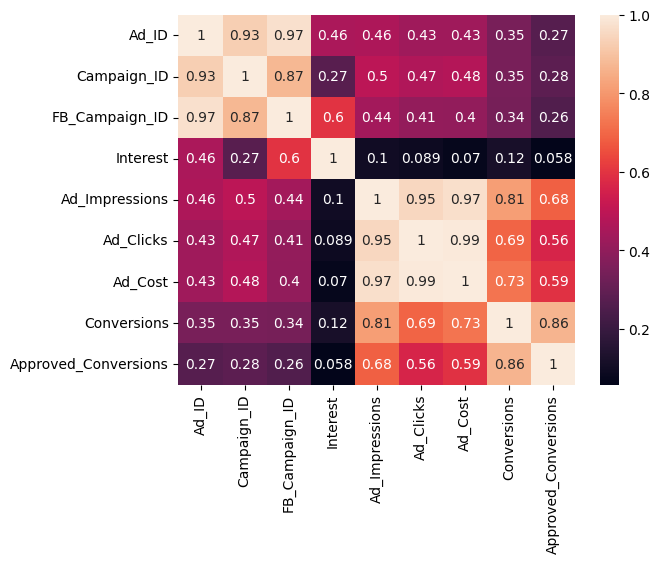

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()


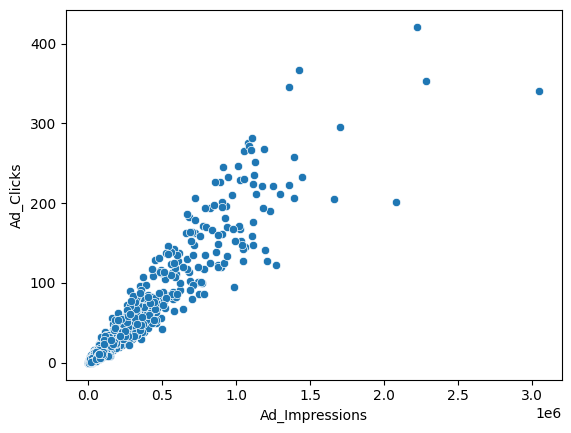

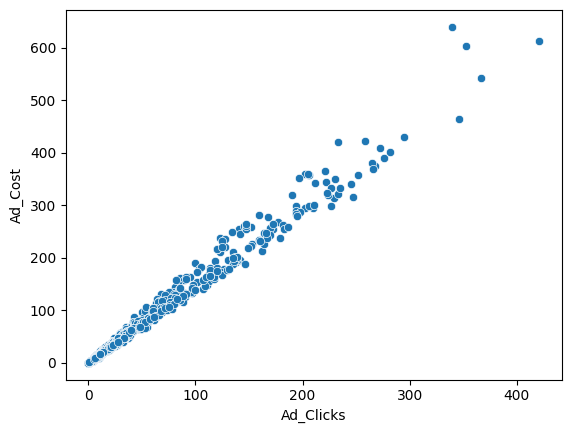

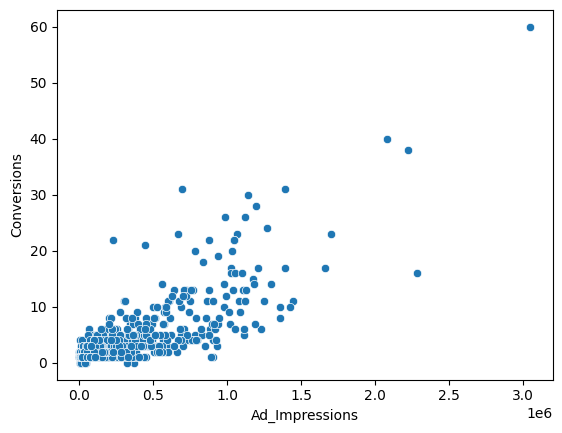

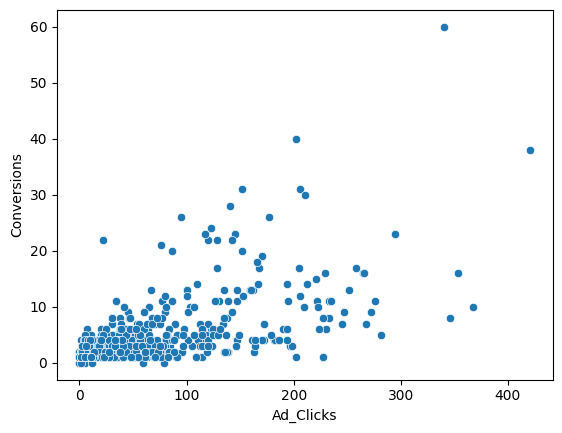

In [ ]:
sns.scatterplot(x='Ad_Impressions', y='Ad_Clicks', data=data)
plt.show()

sns.scatterplot(x='Ad_Clicks', y='Ad_Cost', data=data)
plt.show()

sns.scatterplot(x='Ad_Impressions', y='Conversions', data=data)
plt.show()

sns.scatterplot(x='Ad_Clicks', y='Conversions', data=data)
plt.show()





In [ ]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Reading the data
data = pd.read_csv('/content/gdrive/My Drive/KAG_conversion_data.csv')

# Converting categorical variables to numerical columns using one-hot encoding
data = pd.get_dummies(data, columns=['age', 'gender', 'interest'])

# Splitting the data into train and test sets
X = data.drop(['Total_Conversion'], axis=1)
y = data['Total_Conversion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model and predicting
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Printing the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [-8.61053280e-07 -3.60977514e-03  1.87718991e-05  1.48052269e-05
  1.39008145e-02 -3.79608793e-02  1.35755175e+00  2.32615155e-01
 -4.65156511e-02 -1.21463918e-01 -6.46355862e-02  7.31687214e-02
 -7.31687214e-02 -1.43259339e-01  1.60313717e-01 -1.72270186e-01
 -1.85251889e-01 -6.72970298e-01 -8.52738140e-01  9.10642414e-02
 -1.16148994e-01  9.21111111e-02 -1.35540355e-01  2.61848560e-01
  7.40370493e-03  3.78721410e-01 -1.86432641e-01  9.71777486e-01
 -1.12037680e-01 -5.30370255e-01  3.12884700e-01 -3.78811542e-01
 -6.46526904e-01 -1.17949295e-01 -2.69122620e-01 -4.58646864e-02
 -7.20817469e-01  1.34559170e-01  1.05386152e+00  2.26990517e+00
 -1.63918789e+00 -7.79907378e-01  3.88334053e+00  2.43618195e-01
  6.00380076e-02 -2.19030965e+00 -2.98811782e-01  4.14543166e-01
 -2.78245467e-01  4.93679761e-01  1.49133050e+00 -8.46747537e-01
 -1.00167895e+00]
Intercept: 2.5913217392766192


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


R-squared: 0.8487553010195337
Mean Absolute Error: 1.1235286956479038


In [12]:
import pickle

# save the trained model as a pickle file
filename = 'linear_regression_model.pkl'
pickle.dump(model, open(filename, 'wb'))


In [13]:
# load the model from the pickle file
loaded_model = pickle.load(open(filename, 'rb'))

# make predictions on new data
new_data = [[25, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
new_prediction = loaded_model.predict(new_data)
print(new_prediction)


[2.60159125]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
import pickle
from sklearn.linear_model import LinearRegression

# assume X_train, y_train are the training data
# and model is the trained model
model = LinearRegression()
model.fit(X_train, y_train)

# save the trained model as a pickle file
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(model, f)



In [19]:
import numpy as np

# Define new data
age = 25
gender_male = 1
gender_female = 0
height_cm = 175
weight_kg = 75
ap_hi = 120
ap_lo = 80
cholesterol_normal = 0
cholesterol_above_normal = 0
cholesterol_well_above_normal = 1
glucose_normal = 0
glucose_above_normal = 1
glucose_well_above_normal = 0
smoke_no = 1
smoke_yes = 0
alcohol_no = 1
alcohol_yes = 0
active_no = 1
active_yes = 0
family_history_no = 0
family_history_yes = 1
ap_hi_high = 1
ap_hi_normal = 0
ap_hi_optimal = 0
ap_lo_high = 1
ap_lo_normal = 0
ap_lo_optimal = 0

X_new = np.array([[age, gender_male, gender_female, height_cm, weight_kg, ap_hi, ap_lo,
                  cholesterol_normal, cholesterol_above_normal, cholesterol_well_above_normal,
                  glucose_normal, glucose_above_normal, glucose_well_above_normal,
                  smoke_no, smoke_yes, alcohol_no, alcohol_yes, active_no, active_yes,
                  family_history_no, family_history_yes, ap_hi_high, ap_hi_normal, ap_hi_optimal,
                  ap_lo_high, ap_lo_normal, ap_lo_optimal,
                  1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# load the saved model
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

# assume X_new is the new data for prediction
# and y_pred is the predicted output
y_pred = model.predict(X_new)
print(y_pred)




[107.60002519]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
import pickle

# load the saved model
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

# assume X_new is the new data for prediction
# and y_pred is the predicted output
y_pred = model.predict(X_new)
print(y_pred)


[107.60002519]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


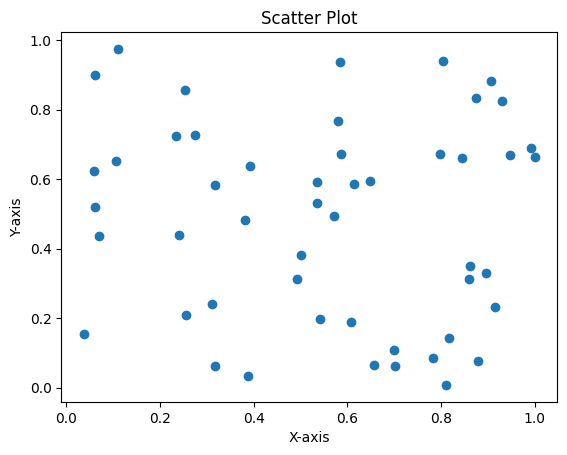

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
x = np.random.rand(50)
y = np.random.rand(50)

# Create a scatter plot
plt.scatter(x, y)

# Add axis labels and a title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()


In [22]:
# check the predicted output
if y_pred == 0:
    print("The patient is at low risk of cardiovascular disease.")
elif y_pred == 1:
    print("The patient is at moderate risk of cardiovascular disease.")
else:
    print("The patient is at high risk of cardiovascular disease.")

# suggest actions based on the predicted risk
if y_pred == 0:
    print("Regular monitoring and follow-up appointments are recommended.")
elif y_pred == 1:
    print("Lifestyle changes and/or medical intervention may be recommended to reduce the risk.")
else:
    print("Urgent medical intervention is recommended to reduce the risk.")


The patient is at high risk of cardiovascular disease.
Urgent medical intervention is recommended to reduce the risk.
